# Used Cars

Used Cars skup podataka sadrži informacije o prodaji automobila koje pruža Craigslist.
Više informacija je moguće pronaći na: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# mozes napravit specijalno rjesenja za npr samo toyotu

## Učitavanje podataka

Na samom početku je potrebno učitati podatke i pogledati od kojih se stupaca sastoji te kakve se informacije u njima pružaju.

In [2]:
df = pd.read_csv('api/vehicles.csv')
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


Kolonu id postavljam kao index skupa podataka.

In [3]:
df = df.set_index('id')

In [4]:
df.shape

(426880, 25)

In [5]:
df.describe()

,price,year,odometer,county,lat,long
count,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


Iz podataka o distribuciji možemo uočiti da kolona price sadrži outliere pa je njih potrebno maknuti iz skupa podataka.

In [6]:
price_sorted = df['price'].sort_values(ascending=False)
price_sorted.head(50)

id
7308056031    3736928711
7302445002    3736928711
7309735768    3024942282
7309730903    3024942282
7314052904    3009548743
7304345156    1410065407
7305153975    1234567890
7305265540    1111111111
7314053169    1111111111
7315836487     987654321
7315849335     987654321
7308010868     135008900
7315524207     123456789
7302369138     123456789
7303218798     123456789
7317052348     123456789
7314339777     123456789
7316831610     123456789
7313748377     113456789
7315961634      99999999
7305725228      25003000
7316047597      17000000
7302117601      12345678
7316737760      12345678
7316737396      12345678
7316736586      12345678
7302112231      12345678
7302113550      12345678
7315944204      11111111
7316820733      10004000
7314124996       6995495
7314839271       5000000
7314563134       3226714
7302895209       2000000
7316162605       1666666
7303379556       1234567
7303381671       1234567
7304058775       1234567
7303377558       1234567
7308748768       12345

Vidimo da postoje cijene koje su nerealno velike. Također postoje cijene poput 123456789 koje izgledaju sasvim nasumičnim. Ovakve su greške mogle nastatiti pogreškom u scrapingu ili pogrešnim unosom u bazu podataka.  Uklonit ću sve cijene koje su veće od 10 000 000 kako bi uklonili outliere is skupa. Također postoje retci u kojima je cijena automobila manja od 100 ili čak 0. Vjerojatno su ovakvi rezultati također nastali greškom jer ne postoje automobili na Craigslistu koji se prodaju po cijeni 0, pa ću i njih ukloniti.

In [7]:
df = df[df['price'] < 10000000]
df = df[df['price'] > 1000]
df.describe()

,price,year,odometer,county,lat,long
count,3.793260e+05,378162.000000,3.772480e+05,0.0,375874.000000,375874.000000
mean,1.975398e+04,2010.997639,9.800611e+04,NaN,38.504596,-94.295888
std,2.379319e+04,9.591236,1.841522e+05,NaN,5.842188,18.073329
min,1.002000e+03,1900.000000,0.000000e+00,NaN,-84.122245,-159.719900
25%,7.995000e+03,2008.000000,3.812300e+04,NaN,34.705500,-110.916482
50%,1.599500e+04,2013.000000,8.749450e+04,NaN,39.190000,-88.005400
75%,2.799000e+04,2017.000000,1.360000e+05,NaN,42.350000,-80.829894
max,6.995495e+06,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [8]:
df['manufacturer'].value_counts()

ford               63123
chevrolet          48974
toyota             30570
honda              19115
nissan             16633
jeep               16527
ram                15912
gmc                15075
bmw                13217
dodge              11497
mercedes-benz       9994
hyundai             9004
subaru              8695
volkswagen          8429
lexus               7551
kia                 7185
audi                6966
cadillac            6310
acura               5513
chrysler            5435
buick               5020
mazda               4881
infiniti            4377
lincoln             3981
volvo               3199
mitsubishi          2975
mini                2211
pontiac             2163
rover               1902
jaguar              1860
porsche             1272
mercury             1044
saturn              1022
alfa-romeo           856
tesla                811
fiat                 728
harley-davidson      136
ferrari               80
datsun                59
aston-martin          21


Odlučio sam se za izradu prediktivnog modela samo nad Ford automobilima.

In [9]:
df = df[df['manufacturer'] == 'ford']

In [10]:
price_sorted = df['price'].sort_values(ascending=False)
price_sorted.head(50)

id
7312388595    1000000
7313752706    1000000
7310495996    1000000
7317067334     999999
7313852214     225000
7316352222     225000
7316240854     213000
7316221976     213000
7315904521     175000
7310531509     150000
7314985804     135000
7315218288     129000
7315218650     129000
7316206367     125000
7314523049     123456
7314829807     123456
7309746801     119999
7316935761     119999
7315954519     119995
7311856070     119995
7309945912     119900
7309389841     119900
7312903257     119888
7306896169     116000
7311596305     112500
7312866001     110000
7315950651     109950
7315301205     107999
7314085180     103500
7305712270     102999
7308288624     102900
7308821737     100995
7314759510     100995
7312900675     100995
7309906351     100995
7312021654     100000
7303591866     100000
7316787660     100000
7306824123     100000
7317034296      99999
7315009609      99999
7316789567      99888
7315520204      99888
7315632211      99700
7316388850      99000
7316386

In [11]:
df = df[df['price'] < 300000]
df.describe()

,price,year,odometer,county,lat,long
count,63119.00000,63119.000000,6.283400e+04,0.0,62560.000000,62560.000000
mean,21527.68176,2010.252174,1.072542e+05,NaN,38.633975,-94.317073
std,16030.76423,11.548930,1.926346e+05,NaN,5.874778,17.399751
min,1003.00000,1913.000000,0.000000e+00,NaN,-56.527029,-159.707445
25%,8950.00000,2008.000000,4.731375e+04,NaN,34.737481,-108.572700
50%,17590.00000,2013.000000,9.887200e+04,NaN,39.512938,-88.332200
75%,30982.00000,2017.000000,1.455000e+05,NaN,42.595900,-81.394800
max,225000.00000,2022.000000,1.000000e+07,NaN,73.325010,94.163200


In [12]:
df.shape

(63119, 25)

## Tipovi podataka

Nakon pregleda podataka, nastavljam sa njihovom obradom. Prvi korak u obradi je pregled tipa stupaca i preoblikovanje tipa ukoliko je to potrebo. Može se vidjeti da je stupac 'year' tipa float64 pa ga je potrebno pretvoriti u tip int64. Također ću izvući broj cilindara iz stringa stupaca cylinders i pretvoriti ga u tip int32 jer model regresije radi samo sa numeričkim vrijednostima.  Na posljetku ću prebaciti stupac 'posting_date' iz object u datetime, a odmah i pretvoriti u numeričku vrijednost tako što ću izračunati koliko je dana prošlo od objva na Craigslistu do danas.

In [13]:
df.dtypes

url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [14]:
df['cylinders'].value_counts()

8 cylinders     16846
6 cylinders     12479
4 cylinders      7199
10 cylinders      913
other             122
3 cylinders       114
5 cylinders        28
12 cylinders        3
Name: cylinders, dtype: int64

In [15]:
from datetime import datetime

df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(pd.Int64Dtype())
df['cylinders'].apply(lambda x: '6 cylinders' if x=='other' else x)
df['cylinders'] = pd.to_numeric(df['cylinders'].apply(lambda x: str(x).split()[0]), errors='coerce').astype(pd.Int32Dtype())
df['posting_date'] = df['posting_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S%z").replace(tzinfo=None))

today = datetime.today()
df['posting_date'] = (today - df['posting_date']).dt.days
df.dtypes

url              object
region           object
region_url       object
price             int64
year              Int64
manufacturer     object
model            object
condition        object
cylinders         Int32
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date      int64
dtype: object

## Odabir značajki

Sve kolone nisu potrebne za predikciju cijene automibila, zbog čega radim novi skup podataka koji će sadržavati podskup kolona originalnog skupa podataka koji bi mogli biti od važnosti u predikciji. Kolona county je izbačena jer sadrži samo NaN vrijednosti. Neke od kolona poput url, region_url, title_status, VIN, image_url, description nisu od koristi u predikciji te nisu uključene u skup podataka koji će se koristiti za trening modela.

In [16]:
df_feat = df.copy()
df_feat = df_feat[['price','year','condition','cylinders','odometer','fuel', 'title_status', 'transmission','drive','size','type','posting_date']]

In [17]:
df_feat.shape

(63119, 12)

In [18]:
nan_cnt = df_feat.isnull().sum(axis=1)

nan_cnt.value_counts()

0    15055
2    14032
3    11543
1     9293
5     8005
4     5114
6       38
9       32
8        5
7        2
dtype: int64

Uklonit ću redove koji imaju većinom nedostajuće vrijednosti kako ne bi trenirao nad primjerima sa većinski imputiranim podacima.

In [19]:
idx = nan_cnt < 8
df_feat = df_feat[idx]

In [20]:
df_feat.shape

(63082, 12)

## Podjela skupa podataka za fazu treniranja

Prije imputacije nedostajućih vrijednosti, potrebno je podijeliti skup podataka na dijelove. Razlog je to što je potrebno vrijednost kojom će se nedostajeća vrijednost zamijeniti, primjerice prilikom računanja moda, izračunati na skupu podataka na kojem se model trenira jer model ne bi trebao biti svjestan podataka na kojima će se testirati njegove performanse.

Obrađeni je skup podataka potrebno podijelit na više dijelova kako bi se nad njima mogla raditi regresija. Najčešće se skup dijeli na podskup za trening, podskup za validaciju te podskup za test, a može se i dodatno podijeliti na podskup za tuning. Podskup za trening služi za treniranje modela, odnosno podešavanje parametara modela, a podskup za validaciju za usporedbu modela sa različitim hiperparametrima. Ta se usporedba radi na skupu za validaciju koji je različit od skupa za treniranje kako bi se izbjegla pristranost jer statistički gledano nije ispravno mjeriti točnost modela na skupu na kojem je treniran. Slična je uporaba i podskupa za tuning. On se koristi kad postoje hiperparametri na više razina. Podskup za test služi za konačnu evaluaciju modela nakon što su određeni svi parametri i hiperparameteri. Također se originalni skup može podijeliti i na 10 (k) dijelo kad bi se radila 10-fold (k-fold) unakrsna validacija (cross-validation). Nakon što se podese hiperparametri modela, model se trenira na cjelokupnom skupu podataka prije nego se deploy-a.

In [21]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_feat, test_size=0.2, random_state=42)
df_train, df_val =  train_test_split(df_train, test_size=0.2, random_state=42)

## Nedostajuće vrijednosti

In [22]:
df_train.isna().sum()

price               0
year                0
condition       17818
cylinders       16270
odometer          171
fuel              213
title_status      563
transmission      215
drive           11043
size            28018
type            10501
posting_date        0
dtype: int64

Postotak nedostajućih vrijednosti po koloni:

In [23]:
df_train.isna().sum() / len(df_train) * 100

price            0.000000
year             0.000000
condition       44.134549
cylinders       40.300208
odometer         0.423561
fuel             0.527593
title_status     1.394531
transmission     0.532547
drive           27.353116
size            69.399584
type            26.010601
posting_date     0.000000
dtype: float64

Ovaj skup podataka sadrži velik broj nedostajućih vrijednosti te je potrebno proći kolonu po kolonu i odrediti na koji će se način pristupiti imputaciji podataka. Imputacija podataka je bitna jer mnogi regresijski modeli ne mogu baratati sa nedostajućim vrijednostima. Različite se metode koriste ovisno o tome jesu li podaci numerički ili kategoričiki. Ukoliko su podaci numerički, podaci se mogu imputirati tako što se umjesto nedostajuće vrijednosti stavi srednja vrijednost, medijan ili mod. Korištenje medijana i moda ima prednost u tome što na njega ne utječu outlieri koliko na srednju vrijednost. S druge strane, ove metode ne uzimaju u obrzir koreliranost podataka. Također je moguće koristit kNN metodu gdje se nedostajeća vrijednost zamijeni ovisno o primjerima koji su najbliži primjeru koji je u pitanju.

Moguće je i u potpunosti zanemarati neku od kolona ukoliko je broj nedostajućih vrijednosti prevelik. Takav je bio slučaj sa kolonom county kod odabira značajki koja se sastoji iskljčivo od NaN vrijednosti.

Kod kategoričkih varijabli je češće korištenje moda (najčešće vrijednsoti) kao zamjenu za nedostajuće vrijednosti. Kod numeričkih je podataka češće korištenje srednje vrijednosti i medijana jer oni bolje opisiuju numeričke varijable. Mod se koristi kad kolona koja je u pitanju nema velik postotak nedostajućih vrijednosti. Kad postoji mnogo nedostajućih vrijednosti, kao što je kolona cylinders, onda je bolje koristiti neku od prediktivnih metoda poput kNN.

Potrebno je i pregledati zavisnost varijabli sa cijenom kako bi ustanovili je li potrebno koristiti sve varijable u treniranju modela.

Krenimo prvo sa imputacijom podataka kod numeričkih varijabli.

### Year

In [25]:
df_price.pivot_table(values=['price'], index=['year'], aggfunc='mean')

,price
year,
1991,9873.200000
1992,11039.968254
1993,9665.000000
1994,6926.318182
1995,7762.940476
1996,9883.043011
1997,8339.223140
1998,6395.369565
1999,11271.143167


Čini se da kolona year ima utjecaj na cijenu te da je cijena veća sa povećanjem vrijednosti varijable year pa ćemo sačuvati ovu varijablu. 

### Cylinders

Sljedeće su grafovi korišteni prilikom odluke oko imputacije nepostojećih vrijenosti u koloni 'cylinders'. Pokušao sam saznati postoji li neka korelacija između kolone 'cylinders' i ostalih kolona.

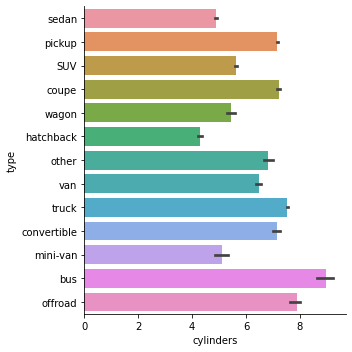

In [24]:
sns.catplot(x='cylinders',y='type',data=df_train,kind='bar')

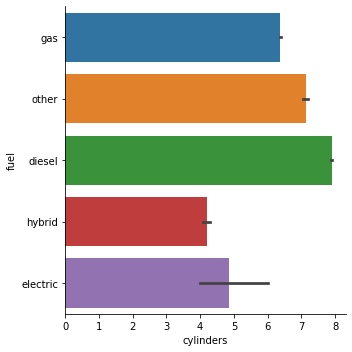

In [25]:
sns.catplot(x='cylinders',y='fuel',data=df_train,kind='bar')

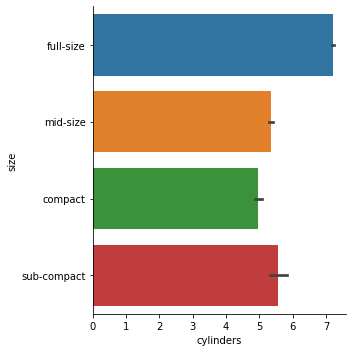

In [26]:
sns.catplot(x='cylinders',y='size',data=df_train,kind='bar')

In [27]:
df_feat['cylinders'].value_counts()

8     16846
6     12479
4      7199
10      913
3       114
5        28
12        3
Name: cylinders, dtype: Int64

In [28]:
cyl = df_train.groupby(['type'])['cylinders'].median()
cyl

type
SUV             6.0
bus            10.0
convertible     8.0
coupe           8.0
hatchback       4.0
mini-van        6.0
offroad         8.0
other           8.0
pickup          8.0
sedan           4.0
truck           8.0
van             6.0
wagon           6.0
Name: cylinders, dtype: Float64

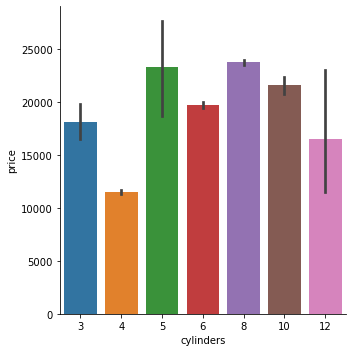

In [29]:
df_cyl = df_feat.copy()
df_cyl = df_cyl[~df_cyl['cylinders'].isna()]
sns.catplot(x='cylinders',y='price',data=df_cyl,kind='bar')

Čini se da cijena ovisi o broju cilindara u automobilu. Automobil može proizvesti veću snagu ukoliko ima više cilindara pa je koreliranost sa cijenom donekle intuitivna. Nedostajeće vrijednosti u ovoj koloni ću zamjeniti sa medijanom cilindara.

In [30]:
cyl_median = df_train['cylinders'].median()

df_train['cylinders'].fillna(cyl_median, inplace=True)
df_val['cylinders'].fillna(cyl_median, inplace=True)
df_test['cylinders'].fillna(cyl_median, inplace=True)

cyl_median

6.0

### Odometer

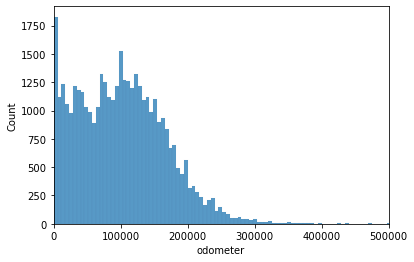

In [31]:
fig, ax = plt.subplots()
sns.histplot(df_train['odometer'], ax=ax)
ax.set_xlim(0,500000)
plt.show()

Nedostajeće vrijednosti u koloni odometer ću zamijeniti srednjom medijanom te kolone.

In [32]:
odom_median = df_train['odometer'].median()
df_train['odometer'] = df_train['odometer'].fillna(odom_median)
df_val['odometer'] = df_val['odometer'].fillna(odom_median)
df_test['odometer'] = df_test['odometer'].fillna(odom_median)
odom_median

98818.0

### Kategoričke vrijednosti

In [33]:
from sklearn.preprocessing import OneHotEncoder

def encode(data_frame, column, encoder):
    tmp = pd.DataFrame(data=encoder.transform(data_frame[[column]]), columns=encoder.get_feature_names_out())
    data_frame.drop(columns=[column], axis=1, inplace=True)
    data_frame = pd.concat([data_frame.reset_index(drop=True), tmp], axis=1)
    
    return data_frame

U nastavku ću pogledati kakav je odnos cijene i kategoričkih varijabli. Sve je kategoričke varijable potrebno pretvoriti u numeričke vrijednosti kako bi modeli mogli raditi sa njima. U tu svrhu koristim OneHotEncoder koji će kategoričku varijublu kodirati u one hot encoding obliku. Prigodno je koristiti ovaj objekt premda ga se može spremiti korištenjem biblioteke joblib kako bi se kasnije mogao učitatit i koristiti prilikom izrade API-a.

In [34]:
# korišteno za potrebe plotova
quant = df_train['price'].quantile([0.2,0.8])

df_plot = df_train[df_train['price']>quant[0.2]]
df_plot = df_plot[df_train['price']<quant[0.8]]

C:\Users\pebe1\AppData\Local\Temp\ipykernel_10892\3149947368.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_plot[df_train['price']<quant[0.8]]


#### Condition

In [35]:
df_train['condition'].value_counts()

good         9879
excellent    9817
like new     2026
fair          705
new            90
salvage        37
Name: condition, dtype: int64

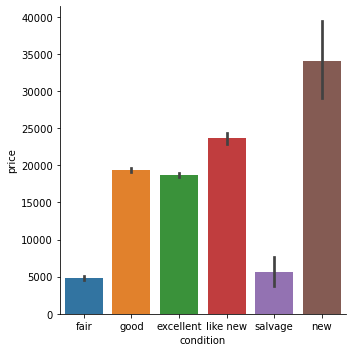

In [36]:
sns.catplot(x='condition', y='price', data=df_train, kind='bar')

Ova kolona sadrži jako velik broj nedostajućih vrijednosti, a izgleda da cijena ovisi o stanju automobila pa ću za nju iskorisiti kNN metodu nakon što imputiram vrijednosti za sve ostale kolone.

#### Fuel

In [37]:
df_train['fuel'].value_counts(normalize=True)

gas         0.779800
diesel      0.143778
other       0.065191
hybrid      0.010035
electric    0.001195
Name: fuel, dtype: float64

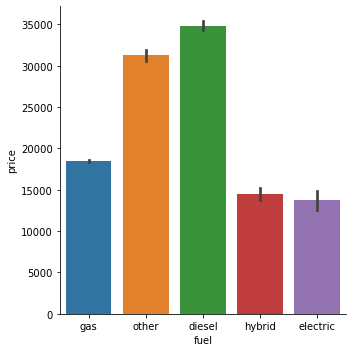

In [38]:
sns.catplot(x='fuel',y='price', data=df_train, kind='bar')

Kolona fuel sadrži malen broj NaN vrijednosti, a čak 80% vrijednosti je 'gas'. Zbog toga ću umjesto NaN vrijednosti staviti mod.

In [39]:
fuel_mode = df_train['fuel'].mode()[0]
df_train['fuel'].fillna(fuel_mode, inplace=True)

fuel_mode

'gas'

In [40]:
df_train.head()

,price,year,condition,cylinders,odometer,fuel,title_status,transmission,drive,size,type,posting_date
id,,,,,,,,,,,,
7303504880,2500,2006,fair,6,158474.0,gas,clean,automatic,fwd,full-size,sedan,777
7311037035,16500,2017,NaN,6,47307.0,other,clean,other,NaN,NaN,NaN,763
7315245381,30990,2019,good,6,5468.0,gas,clean,other,NaN,NaN,pickup,754
7316345844,4495,2008,good,4,150000.0,gas,rebuilt,automatic,fwd,mid-size,SUV,752
7306976563,28995,2017,NaN,6,147053.0,other,clean,automatic,rwd,NaN,NaN,770


In [41]:
fuel_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype='int')
fuel_encoder.fit(df_train[['fuel']])

df_train = encode(df_train, 'fuel', fuel_encoder)
df_val = encode(df_val, 'fuel', fuel_encoder)
df_test = encode(df_test, 'fuel', fuel_encoder)

#### Type

In [42]:
df_train['type'].value_counts()

pickup         7863
truck          6502
SUV            5370
sedan          3438
coupe          1629
van            1558
other          1272
hatchback       898
convertible     575
wagon           516
mini-van        122
bus             110
offroad          18
Name: type, dtype: int64

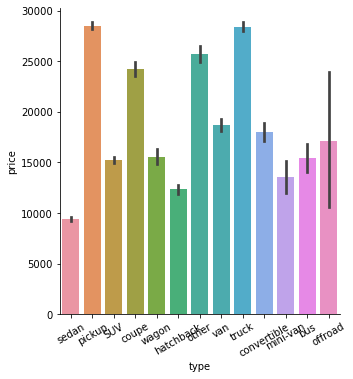

In [43]:
ax = sns.catplot(x='type',y='price', data=df_train, kind='bar')
ax.set_xticklabels(rotation=30)
plt.show()

In [44]:
df_train.groupby('type')['price'].mean()

type
SUV            15190.056238
bus            15429.745455
convertible    17981.073043
coupe          24236.041130
hatchback      12367.775056
mini-van       13549.286885
offroad        17116.111111
other          25718.638365
pickup         28526.120819
sedan           9356.158232
truck          28416.861735
van            18704.245186
wagon          15546.620155
Name: price, dtype: float64

<AxesSubplot:xlabel='type', ylabel='Count'>

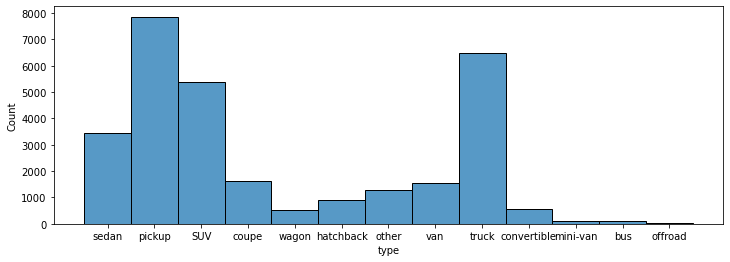

In [45]:
fig, ax = plt.subplots(figsize=(12,4))
sns.histplot(ax=ax, data=df_train['type'])

Cijena i tip autombila su korelirani te ću nedostjauće vrijednosti u ovoj koloni zamijeniti modom.

In [46]:
df_type = df_train['type'].fillna(df_train['type'].mode()[0]).copy()

<AxesSubplot:xlabel='type', ylabel='Count'>

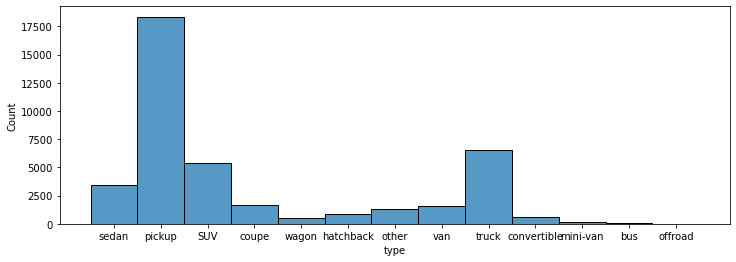

In [47]:
fig, ax = plt.subplots(figsize=(12,4))
sns.histplot(ax=ax, data=df_type)

Nedostajeće ću vrijednosti zamijeniti modom jer je varijabla kategoričkog tipa. U ovom je slučaju distribucija kolone 'type' malo promijenjena imputacijom što može imati utjecaj na kranju točnost predikcije cijena.

In [48]:
type_mode = df_train['type'].mode()[0]
df_train['type'] = df_train['type'].fillna(type_mode)

type_mode

'pickup'

In [49]:
type_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype='int')
type_encoder.fit(df_train[['type']])

df_train = encode(df_train, 'type', type_encoder)
df_val = encode(df_val, 'type', type_encoder)
df_test = encode(df_test, 'type', type_encoder)

#### Title_status

In [50]:
df_train['title_status'].value_counts()

clean         38668
rebuilt         592
salvage         299
lien            159
missing          84
parts only        7
Name: title_status, dtype: int64

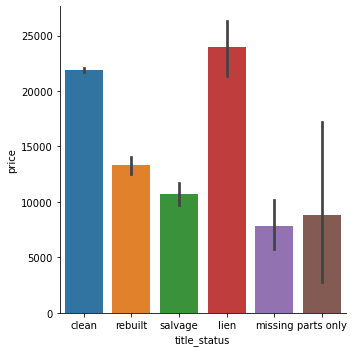

In [51]:
sns.catplot(x='title_status',y='price', data=df_train, kind='bar')

Nedostajeće vrijednosti ove kategoričke varijable također imputiram modom.

In [52]:
title_status_mode = df_train['title_status'].mode()[0]
df_train['title_status'].fillna(title_status_mode, inplace=True)

title_status_mode

'clean'

In [53]:
title_status_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype='int')
title_status_encoder.fit(df_train[['title_status']])

df_train = encode(df_train, 'title_status', title_status_encoder)
df_val = encode(df_val, 'title_status', title_status_encoder)
df_test = encode(df_test, 'title_status', title_status_encoder)

#### Transmission

In [54]:
df_train['transmission'].value_counts()

automatic    34374
other         3570
manual        2213
Name: transmission, dtype: int64

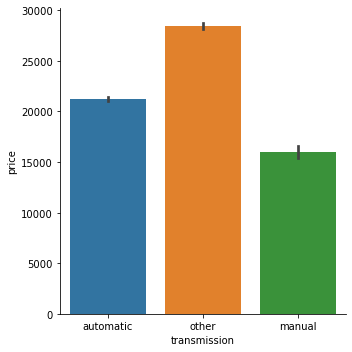

In [55]:
sns.catplot(x='transmission',y='price', data=df_train, kind='bar')

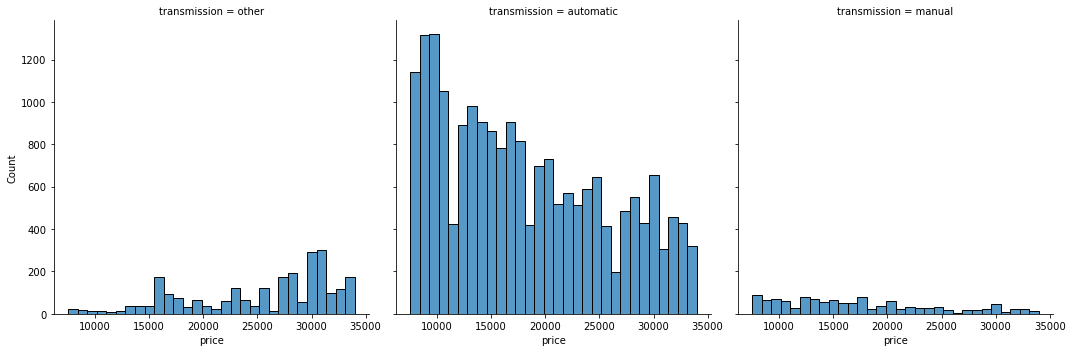

In [56]:
sns.displot(data=df_plot, x='price', col='transmission')

Čini se da ova kolona ima utjecaj na cijenu automobila pa ću ju zadržati. Kolona transmission sadrži velikom većinom vrijednost 'automatic', ima malen broj nedostajućih vrijednosti. Zbog toga ću nedostajeće vrijednosti zamijeniti sa vrijednosti 'automatic', odnosno sa modom.

In [57]:
transmission_mode = df_train['transmission'].mode()[0]
df_train['transmission'].fillna(transmission_mode, inplace=True)

transmission_mode

'automatic'

In [58]:
transmission_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype='int')
transmission_encoder.fit(df_train[['transmission']])

df_train = encode(df_train, 'transmission', transmission_encoder)
df_val = encode(df_val, 'transmission', transmission_encoder)
df_test = encode(df_test, 'transmission', transmission_encoder)

#### Drive

In [59]:
df_train['drive'].value_counts()

4wd    15725
rwd     7157
fwd     6447
Name: drive, dtype: int64

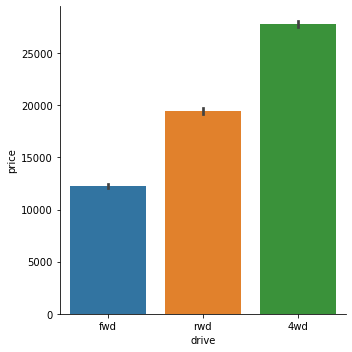

In [60]:
sns.catplot(x='drive',y='price', data=df_train, kind='bar')

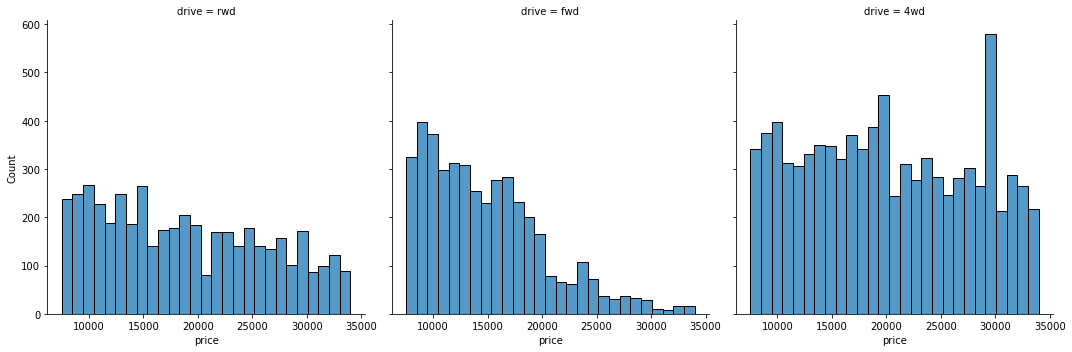

In [61]:
sns.displot(data=df_plot, x='price', col='drive')

Nedostajeće ću vrijednosti zamijeniti modom.

In [62]:
drive_mode = df_train['drive'].mode()[0]
df_train['drive'].fillna(drive_mode, inplace=True)

drive_mode

'4wd'

In [63]:
drive_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype='int')
drive_encoder.fit(df_train[['drive']])

df_train = encode(df_train, 'drive', drive_encoder)
df_val = encode(df_val, 'drive', drive_encoder)
df_test = encode(df_test, 'drive', drive_encoder)

#### Size

In [64]:
df_train['size'].value_counts()

full-size      8593
mid-size       2404
compact        1033
sub-compact     324
Name: size, dtype: int64

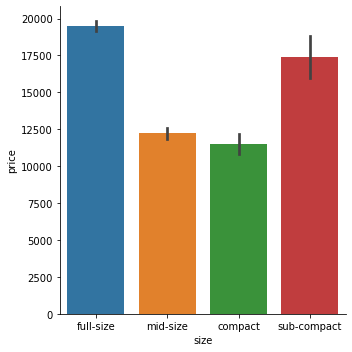

In [65]:
sns.catplot(x='size',y='price', data=df_train, kind='bar')

<AxesSubplot:xlabel='size', ylabel='price'>

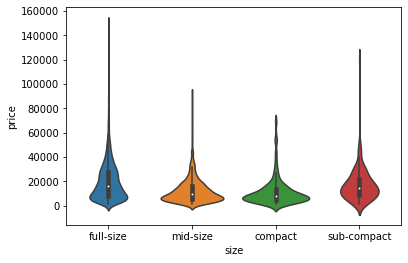

In [66]:
sns.violinplot(x='size',y='price', data=df_train)

Za potrebe vizualizacije stvorit ću skup podataka koji sadrži vrijednosti u drugom i trećem kvantilu.

<AxesSubplot:xlabel='size', ylabel='price'>

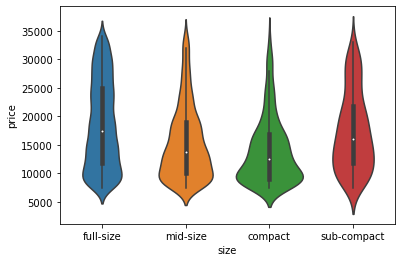

In [67]:
sns.violinplot(x='size',y='price', data=df_plot)

Ovu ću kolonu ispustiti iz skupa podataka jer 70% primjera ima nedostajuće vrijednosti.

In [68]:
df_train.drop(['size'], axis=1, inplace=True)
df_val.drop(['size'], axis=1, inplace=True)
df_test.drop(['size'], axis=1, inplace=True)

#### Condition

In [69]:
df_train['condition'].value_counts()

good         9879
excellent    9817
like new     2026
fair          705
new            90
salvage        37
Name: condition, dtype: int64

In [70]:
condition_map = {'salvage':1, 'fair': 2, 'good': 3, 'excellent':4,'like new':5,'new':6}

df_train['condition'] = df_train['condition'].map(condition_map)
df_val['condition'] = df_val['condition'].map(condition_map)
df_test['condition'] = df_test['condition'].map(condition_map)

In [71]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 3)
df_train = pd.DataFrame(imputer.fit_transform(df_train),columns = df_train.columns)

In [72]:
df_val = pd.DataFrame(imputer.transform(df_val),columns = df_train.columns)
df_test = pd.DataFrame(imputer.transform(df_test),columns = df_train.columns)

In [73]:
X_train = df_train.drop(['price'], axis=1)
y_train = df_train['price']

X_val = df_val.drop(['price'], axis=1)
y_val = df_val['price']

X_test = df_test.drop(['price'], axis=1)
y_test = df_test['price']

In [74]:
X_train.isna().sum().sum()

0

## Treniranje modela

Problem predikcije cijene automobila je regresijski problem. On se razlikuje od klasifikacije u tome što je cilj klasifikacije pridijeliti jednu od klasa novom primjeru. S druge strane, regresijom se pokušava predvidjeti neka kontinuirana brojčana vrijednost na temelju novog primjera. U ovom je slučaju to cijena automobila. Svaka se metoda strojnog učenja sastoji od modela, objektivne funkcije i metode optimizacije. Samim time što se klasifikacijom dodjeljuje klasa nekom primjeru, a regresijom se predviđa brojčana vrijednost, njihove će objektivne funckije (model) i funkcije pogreške biti različite. Primjerice postoji SVM za klasifikaciju i za regresiju gdje je onaj za regresiju ima objektivnu funkciju koja je dodatno prilagođena za problem regresije.

Postoje razni regresijski modeli, od kojih su neki: linearna regresija, LS-SVM i regresijsko stablo odluke. Odlučujem se za linearnu regresiju. Kako bi ovaj model mogao raditi za kategoričkim varijablama potrebno ih je nekako pretvoriti u numeričke vrijednost. To je učinjeno u prethodnim koracima pomoću get_dummies funkcije. Tako će model moći naučiti važnost svake kategoričke varijable i tako odrediti vrijednost pripadajućih parametara.

### Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
y_hat = model.predict(X_val)

In [76]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_val, y_hat)


print('Root Mean Squared Erorr (RMSE): ',np.sqrt(mse))

Root Mean Squared Erorr (RMSE):  12042.96016875404


### Gradient Boosting Regressor

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

n_est_arr = [200,300,400,500,600,700,800]
l_rate_arr = [0.01,0.03,0.1,0.3,1]

for n_est in n_est_arr:
    for l_rate in l_rate_arr:
        grad_model = GradientBoostingRegressor(n_estimators=n_est, max_depth=10, learning_rate=l_rate, random_state=42).fit(X_train,y_train.ravel())
        y_hat_grad = grad_model.predict(X_val)
        
        mse = mean_squared_error(y_val, y_hat_grad)

        print('N_est: {} L_rate: {} Root Mean Squared Erorr (RMSE): {}'.format(n_est,l_rate,np.sqrt(mse)))

N_est: 200 L_rate: 0.01 Root Mean Squared Erorr (RMSE): 7103.785927102599
N_est: 200 L_rate: 0.03 Root Mean Squared Erorr (RMSE): 6445.053342252423
N_est: 200 L_rate: 0.1 Root Mean Squared Erorr (RMSE): 6208.834381276295
N_est: 200 L_rate: 0.3 Root Mean Squared Erorr (RMSE): 6214.65385344179
N_est: 200 L_rate: 1 Root Mean Squared Erorr (RMSE): 8282.455404145308
N_est: 300 L_rate: 0.01 Root Mean Squared Erorr (RMSE): 6665.973506770944
N_est: 300 L_rate: 0.03 Root Mean Squared Erorr (RMSE): 6368.9157563677445
N_est: 300 L_rate: 0.1 Root Mean Squared Erorr (RMSE): 6137.687592699549
N_est: 300 L_rate: 0.3 Root Mean Squared Erorr (RMSE): 6200.216451949011
N_est: 300 L_rate: 1 Root Mean Squared Erorr (RMSE): 8284.649167802125
N_est: 400 L_rate: 0.01 Root Mean Squared Erorr (RMSE): 6514.495684991257
N_est: 400 L_rate: 0.03 Root Mean Squared Erorr (RMSE): 6313.337621299381
N_est: 400 L_rate: 0.1 Root Mean Squared Erorr (RMSE): 6095.843013874843
N_est: 400 L_rate: 0.3 Root Mean Squared Erorr (R

Izabrat ću model koji se sastoji od 400 estimatora i kojem je learning rate jednak 0.1 jer ima među najmanjim greškama na skupu podataka za validaciju, a jednostavniji je od ostalih koji imaju gotovo jednaku grešku.

In [100]:
n_est = 400
l_rate = 0.1

grad_model = GradientBoostingRegressor(n_estimators=n_est, max_depth=10, learning_rate=l_rate, random_state=42).fit(X_train,y_train.ravel())
y_hat_grad = grad_model.predict(X_val)
        
mse = mean_squared_error(y_val, y_hat_grad)

print('N_est: {} L_rate: {} Root Mean Squared Erorr (RMSE): {}'.format(n_est,l_rate,np.sqrt(mse)))

N_est: 400 L_rate: 0.1 Root Mean Squared Erorr (RMSE): 6337.658028597737


<AxesSubplot:xlabel='price'>

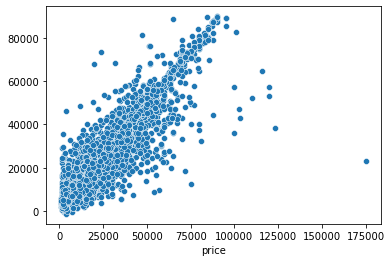

In [87]:
sns.scatterplot(x=y_val, y=y_hat_grad)

### Support Vector Regression

In [79]:
from sklearn.svm import SVR

svr_model = SVR().fit(X_train, y_train.ravel())
y_hat_svr = svr_model.predict(X_val)

mse = mean_squared_error(y_val, y_hat_svr)

print('Root Mean Squared Erorr (RMSE): ',np.sqrt(mse))

Root Mean Squared Erorr (RMSE):  15639.787495897277


C:\Users\pebe1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

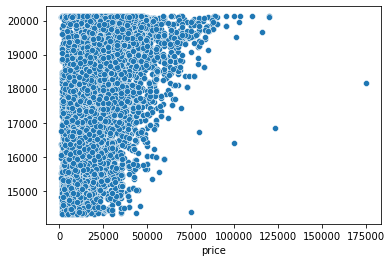

In [80]:
sns.scatterplot(y_val, y_hat_svr)

### Konačna predikcija na skupu za testiranje

In [98]:
Xt = pd.concat([X_train, X_val], axis=0)
yt = pd.concat([y_train, y_val], axis=0)

grad_model = GradientBoostingRegressor(n_estimators=400, max_depth=10, learning_rate=0.1, random_state=42).fit(Xt,yt.ravel())
y_hat_grad = grad_model.predict(X_test)
        
mse = mean_squared_error(y_test, y_hat_grad)

print('Root Mean Squared Erorr (RMSE): ', np.sqrt(mse))

Root Mean Squared Erorr (RMSE):  5573.407594334527


In [ ]:
sns.scatterplot(y_test, y_hat_grad)

### Zaključni komentari

Konačni je model GradientBoostingRegressor sa iznad definiranim parametrim. Odlučujem se za taj model jer daje najmanju pogrešku na skupu za validaciju. On se često koristi u Kaggle natjecanjima te većinom ima dobre performanse kod skupova podataka koji se tamo nalaze. To naravno nije jedino model za regresiju, ali se pokazao kao najbolji na ovom skupu podataka. Model se evaluirao pomoću root mean sqaure error mjere odstupanja predviđenih od stvarnih vrijednosti. Ova je mjera česta kod regresije, ali nije uvijek najbolji izbor, primjerica kad skup ima mnogo outliera. Model sam spremio pomoću joblib biblioteke. Ovo je jednostavan i prikladan način za pohranu i kasnije učitavanje python objekata. Moguće je također spremiti samo parametre modela pa nanovo napraviti objekt i podesiti mu parametre na te koji su spremljeni, no korištenje joblib biblioteke je jednostavnija opcija. Također je potrebno spremiti OneHotEncoder objekte kako bi se podaci, koji su poslani u svrhu predikcije, mogli urediti tako da budu u obliku u kojem se mogu koristiti sa treniranim modelom. 


Podaci se na API šalju u obliku array-a koji se sastoji od podataka u json obliku. Ovaj je oblik uobičajen kod komunikacije preko HTTP-a. Ukoliko se podaci sastoje od nedostajućih vrijednosti, to nije problem jer se tim vrijednostima može pridijeliti nula pa parametar koji je povezan s tom kolonom neće bit uzet u obzir, ili se može napraviti imputacija podataka kao što je to učinjeno kod treniranja modela. Ukoliko su podaci poslani u krivom redoslijedu biblioteka pandas će se nositi s time. Ako su podaci neispravno formatirani, model se s time neće moći nositi tako da je potrebno napraviti određene provjere, ili na strani klijenta ili poslužitelja koji će koristiti prediktivni model.

Rješenje je kontejnizirano korištenje Docker tehnologije. Prednost je ta što tako model i njegovo pokretanje i sve zavisnosti od kojih se sastoji ne ovise o računalo korisnika jer će se sve izvršiti u virtualnom okruženju. Sve su zavisnosti specificirane kod izgranje slike Dockera pa se model može koristiti na svakom računalo neovisno od verzije programskog jezika, os-a i sličnih ograničenja.